Data cleaning:
- drop unnecessary columns
- change index
- clean columns with .str(), .split(), .fillna(), .apply() [with context], 
- rename columns to combine with other datasets
- skip rows?

This data:
- day format (mid 2000s - present)
- CountOf...
- intakes/outtakes statistics
- (Optional)

In [86]:
import numpy as np
import pandas as pd

In [87]:
#Loading Intake and Outake Data
TXin = pd.read_csv("../main_data/locale_specific_data/AustinTXData.csv", parse_dates = ["DateTime"])
TXout = pd.read_csv("../main_data/locale_specific_data/AustinTXOut.csv", parse_dates = ["DateTime"])

#checking data head and tail
print(TXin.head())
print(TXin.tail())

print(TXout.head())
print(TXout.tail())

/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_38752/1831058770.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  TXout = pd.read_csv("../../main_data/locale_specific_data/AustinTXOut.csv", parse_dates = ["DateTime"])


In [ ]:
##in data cleaning
TXdogin = TXin[TXin["Animal Type"] == "Dog"]

In [ ]:
print(TXdogin.head())

   Animal ID      Name            DateTime     MonthYear  \
2    A665763       NaN 2013-10-22 15:10:00  October 2013   
3    A379998  Disciple 2013-10-23 11:42:00  October 2013   
4    A634503     Otter 2013-10-01 14:49:00  October 2013   
6    A665002       NaN 2013-10-12 11:45:00  October 2013   
14   A645345     Honey 2013-10-01 17:54:00  October 2013   

                                  Found Location      Intake Type  \
2   E Riverside Dr/Royal Crest Dr in Austin (TX)            Stray   
3                 51St And Grover in Austin (TX)            Stray   
4                                     Manor (TX)  Owner Surrender   
6                 509 E Todd Lane in Austin (TX)            Stray   
14                                   Austin (TX)  Owner Surrender   

   Intake Condition Animal Type Sex upon Intake Age upon Intake  \
2            Normal         Dog     Intact Male        4 months   
3            Normal         Dog     Intact Male        10 years   
4            Normal    

In [ ]:
# Function to remove seconds, minutes, and hours from datetime column
from datetime import datetime
def remove_time_components(dt):
    return datetime(dt.year, dt.month, dt.day)

# Apply the function to the 'datetime_column'
TXdogin["DateTime"] = TXdogin["DateTime"].apply(remove_time_components)

/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_38752/2832092209.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TXdogin["DateTime"] = TXdogin["DateTime"].apply(remove_time_components)


In [ ]:
#function worked
print(TXdogin.head())

   Animal ID      Name   DateTime     MonthYear  \
2    A665763       NaN 2013-10-22  October 2013   
3    A379998  Disciple 2013-10-23  October 2013   
4    A634503     Otter 2013-10-01  October 2013   
6    A665002       NaN 2013-10-12  October 2013   
14   A645345     Honey 2013-10-01  October 2013   

                                  Found Location      Intake Type  \
2   E Riverside Dr/Royal Crest Dr in Austin (TX)            Stray   
3                 51St And Grover in Austin (TX)            Stray   
4                                     Manor (TX)  Owner Surrender   
6                 509 E Todd Lane in Austin (TX)            Stray   
14                                   Austin (TX)  Owner Surrender   

   Intake Condition Animal Type Sex upon Intake Age upon Intake  \
2            Normal         Dog     Intact Male        4 months   
3            Normal         Dog     Intact Male        10 years   
4            Normal         Dog   Spayed Female         2 years   
6         

In [ ]:
##creating new data columns for 5 types of intake categories - checking after incase of odd settingwithcopywarning
TXdogin["Stray_Abandoned"] = 0
TXdogin["Owner_Surrender"] = 0
TXdogin["Euthanasia_Req"] = 0
TXdogin["Public_Assist"] = 0
TXdogin["Other"] = 0

/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_38752/2905547574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TXdogin["Stray_Abandoned"] = 0
/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_38752/2905547574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TXdogin["Owner_Surrender"] = 0
/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_38752/2905547574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [ ]:
##viola new columns are all 0s - ripe for replacement
print(TXdogin.head())

   Animal ID      Name   DateTime     MonthYear  \
2    A665763       NaN 2013-10-22  October 2013   
3    A379998  Disciple 2013-10-23  October 2013   
4    A634503     Otter 2013-10-01  October 2013   
6    A665002       NaN 2013-10-12  October 2013   
14   A645345     Honey 2013-10-01  October 2013   

                                  Found Location      Intake Type  \
2   E Riverside Dr/Royal Crest Dr in Austin (TX)            Stray   
3                 51St And Grover in Austin (TX)            Stray   
4                                     Manor (TX)  Owner Surrender   
6                 509 E Todd Lane in Austin (TX)            Stray   
14                                   Austin (TX)  Owner Surrender   

   Intake Condition Animal Type Sex upon Intake Age upon Intake  \
2            Normal         Dog     Intact Male        4 months   
3            Normal         Dog     Intact Male        10 years   
4            Normal         Dog   Spayed Female         2 years   
6         

In [ ]:
print(TXdogin["Intake Type"].value_counts())

Intake Type
Stray                 60956
Owner Surrender       19953
Public Assist          7788
Abandoned               874
Euthanasia Request      183
Wildlife                  1
Name: count, dtype: int64


In [ ]:
#Creating binary outcome vars for each outcome of interest
for index, row in TXdogin.iterrows():
    ##if intake is stray or abanoned assign 1 to appropriate column
    if row['Intake Type'] == "Stray" or row['Intake Type'] == "Abandoned":
        TXdogin.at[index, 'Stray_Abandoned'] = 1
    ##same for surrender
    elif row['Intake Type'] == "Owner Surrender":
        TXdogin.at[index, 'Owner_Surrender'] = 1
    ##same for euthanasia
    elif row['Intake Type'] == "Euthanasia Request":
        TXdogin.at[index, 'Euthanasia_Req'] = 1 
    ##Same for public assist and wildlife
    elif row['Intake Type'] == "Public Assist" or row['Intake Type'] == "Wildlife":
        TXdogin.at[index, 'Public_Assist'] = 1
    ##everything else is other - there is no other in the TX intake data
    else:
        TXdogin.at[index, 'Other'] = 1
    

In [ ]:
#Checking if for loop works properly
print(TXdogin["Other"].sum())
print(TXdogin["Stray_Abandoned"].sum())
print(TXdogin["Euthanasia_Req"].sum())
print(TXdogin["Public_Assist"].sum())
print(TXdogin["Owner_Surrender"].sum())

0
61830
183
7789
19953


In [ ]:
#selecting only columns we need (start here for stage 2)
print(TXdogin.head())
keepercols = ['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Intake Type', 'Stray_Abandoned', 'Euthanasia_Req', 'Public_Assist', 'Owner_Surrender', 'Other']
TXdoginclean = TXdogin[keepercols]


   Animal ID      Name   DateTime     MonthYear  \
2    A665763       NaN 2013-10-22  October 2013   
3    A379998  Disciple 2013-10-23  October 2013   
4    A634503     Otter 2013-10-01  October 2013   
6    A665002       NaN 2013-10-12  October 2013   
14   A645345     Honey 2013-10-01  October 2013   

                                  Found Location      Intake Type  \
2   E Riverside Dr/Royal Crest Dr in Austin (TX)            Stray   
3                 51St And Grover in Austin (TX)            Stray   
4                                     Manor (TX)  Owner Surrender   
6                 509 E Todd Lane in Austin (TX)            Stray   
14                                   Austin (TX)  Owner Surrender   

   Intake Condition Animal Type Sex upon Intake Age upon Intake  \
2            Normal         Dog     Intact Male        4 months   
3            Normal         Dog     Intact Male        10 years   
4            Normal         Dog   Spayed Female         2 years   
6         

In [ ]:
##checking head
print(TXdoginclean.head())

   Animal ID      Name   DateTime     MonthYear      Intake Type  \
2    A665763       NaN 2013-10-22  October 2013            Stray   
3    A379998  Disciple 2013-10-23  October 2013            Stray   
4    A634503     Otter 2013-10-01  October 2013  Owner Surrender   
6    A665002       NaN 2013-10-12  October 2013            Stray   
14   A645345     Honey 2013-10-01  October 2013  Owner Surrender   

    Stray_Abandoned  Euthanasia_Req  Public_Assist  Owner_Surrender  Other  
2                 1               0              0                0      0  
3                 1               0              0                0      0  
4                 0               0              0                1      0  
6                 1               0              0                0      0  
14                0               0              0                1      0  


In [ ]:
##Creating InTakesSum Column
TXdoginclean['TotalIntakes'] = TXdoginclean['Stray_Abandoned'] + TXdoginclean['Euthanasia_Req'] + TXdoginclean['Public_Assist'] + TXdoginclean['Owner_Surrender'] + TXdoginclean['Other']

/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_38752/878514537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TXdoginclean['TotalIntakes'] = TXdoginclean['Stray_Abandoned'] + TXdoginclean['Euthanasia_Req'] + TXdoginclean['Public_Assist'] + TXdoginclean['Owner_Surrender'] + TXdoginclean['Other']


In [ ]:
##Making Vectors with counts per day for big dataset or smaller analyses
TXStrayAbanbyDay = TXdoginclean.groupby('DateTime')['Stray_Abandoned'].sum().reset_index()
TXEuthRbyDay = TXdoginclean.groupby('DateTime')['Euthanasia_Req'].sum().reset_index()
TXPAbyDay = TXdoginclean.groupby('DateTime')['Public_Assist'].sum().reset_index()
TXSurrbyDay = TXdoginclean.groupby('DateTime')['Owner_Surrender'].sum().reset_index()
TXOtherbyDay = TXdoginclean.groupby('DateTime')['Other'].sum().reset_index()
TXTotalIntakebyDay = TXdoginclean.groupby('DateTime')['TotalIntakes'].sum().reset_index()

In [ ]:
print(TXTotalIntakebyDay)


       DateTime  TotalIntakes
0    2013-10-01            42
1    2013-10-02            28
2    2013-10-03            26
3    2013-10-04            30
4    2013-10-05            39
...         ...           ...
3865 2024-05-12            19
3866 2024-05-13            25
3867 2024-05-14            24
3868 2024-05-15            17
3869 2024-05-16             2

[3870 rows x 2 columns]
       DateTime  Stray_Abandoned
0    2013-10-01               30
1    2013-10-02               20
2    2013-10-03               19
3    2013-10-04               24
4    2013-10-05               27
...         ...              ...
3865 2024-05-12               18
3866 2024-05-13               12
3867 2024-05-14               17
3868 2024-05-15               14
3869 2024-05-16                2

[3870 rows x 2 columns]


In [ ]:


# Outputting data to csv

#Create column headers
header_list= keepercols
header_list.append('TXTotalIntakebyDay')


['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Intake Type', 'Stray_Abandoned', 'Euthanasia_Req', 'Public_Assist', 'Owner_Surrender', 'Other', 'TXTotalIntakebyDay']


In [ ]:
#Put the daily data into a Data Frame

TXintakeByDay = pd.concat([TXStrayAbanbyDay, #both columns to include the date
                           TXEuthRbyDay.iloc[:, 1], #only need counts, not date
                           TXPAbyDay.iloc[:, 1],
                           TXSurrbyDay.iloc[:, 1],
                           TXOtherbyDay.iloc[:, 1],
                           TXTotalIntakebyDay.iloc[:, 1]],
                           axis=1 #concatinate by columns instead of rows
                           )

TXintakeByDay.to_csv('../main_data/locale_specific_data/AustinTXIntakeClean.csv')


In [ ]:
#plotting time series data
import matplotlib.pyplot as plt




Text(0.5, 1.0, 'Austin, Texas: Total Dog Intakes by Date (2014 - 2024)')

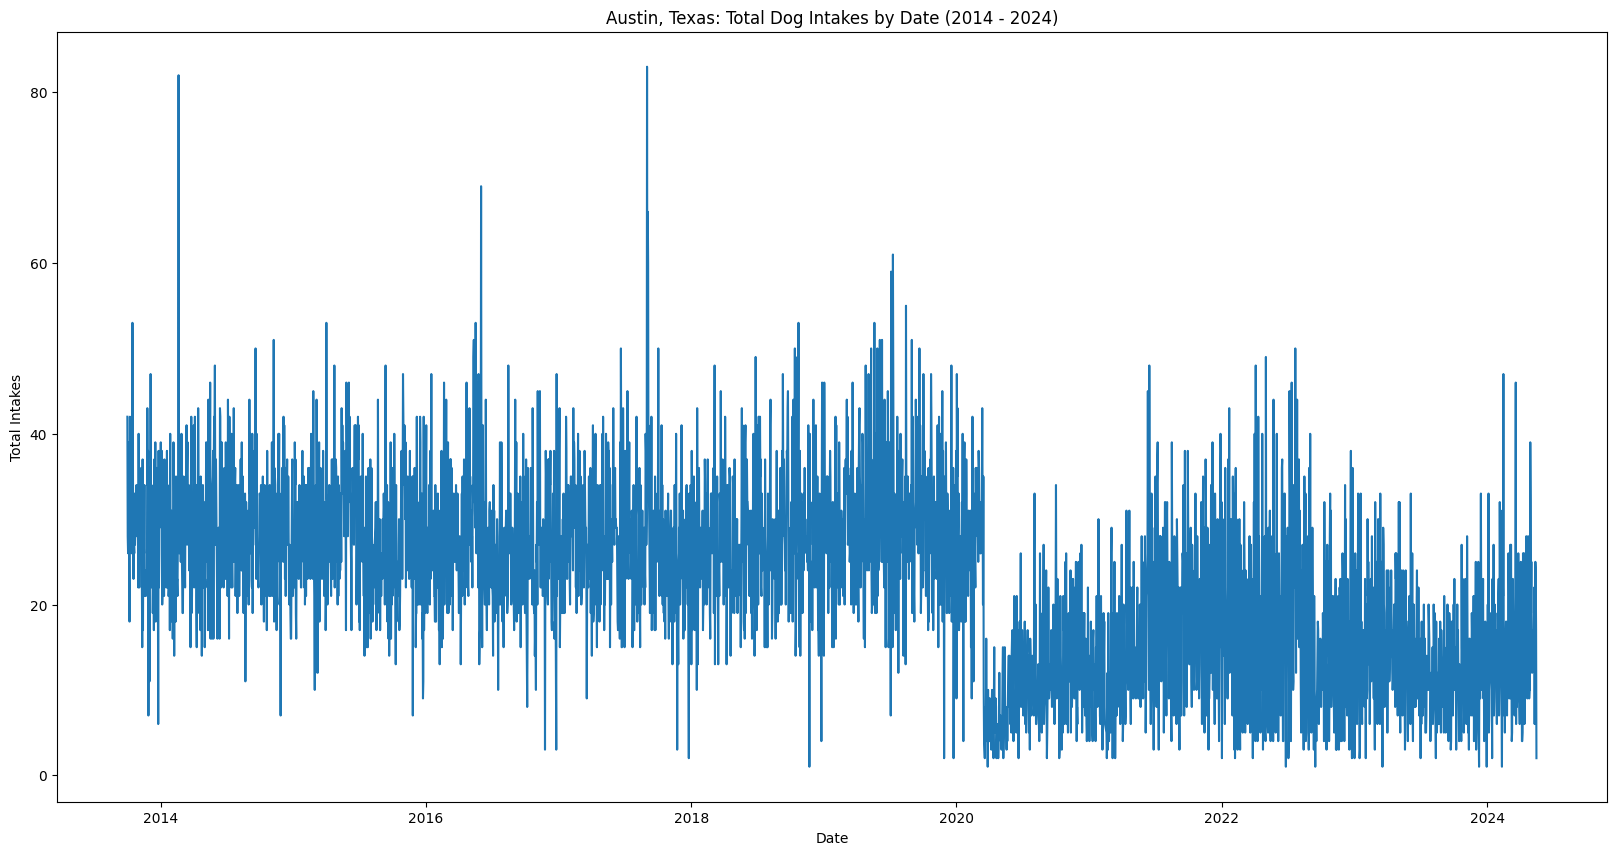

In [ ]:
#The plot for intakes
plt.figure(figsize=(20, 10))
plt.plot(TXTotalIntakebyDay['DateTime'], TXTotalIntakebyDay['TotalIntakes'])
plt.xlabel('Date')
plt.ylabel('Total Intakes')
plt.title('Austin, Texas: Total Dog Intakes by Date (2014 - 2024)')


Text(0.5, 1.0, 'Austin, Texas: Total Stray/Abandoned Dog Intakes by Date (2014 - 2024)')

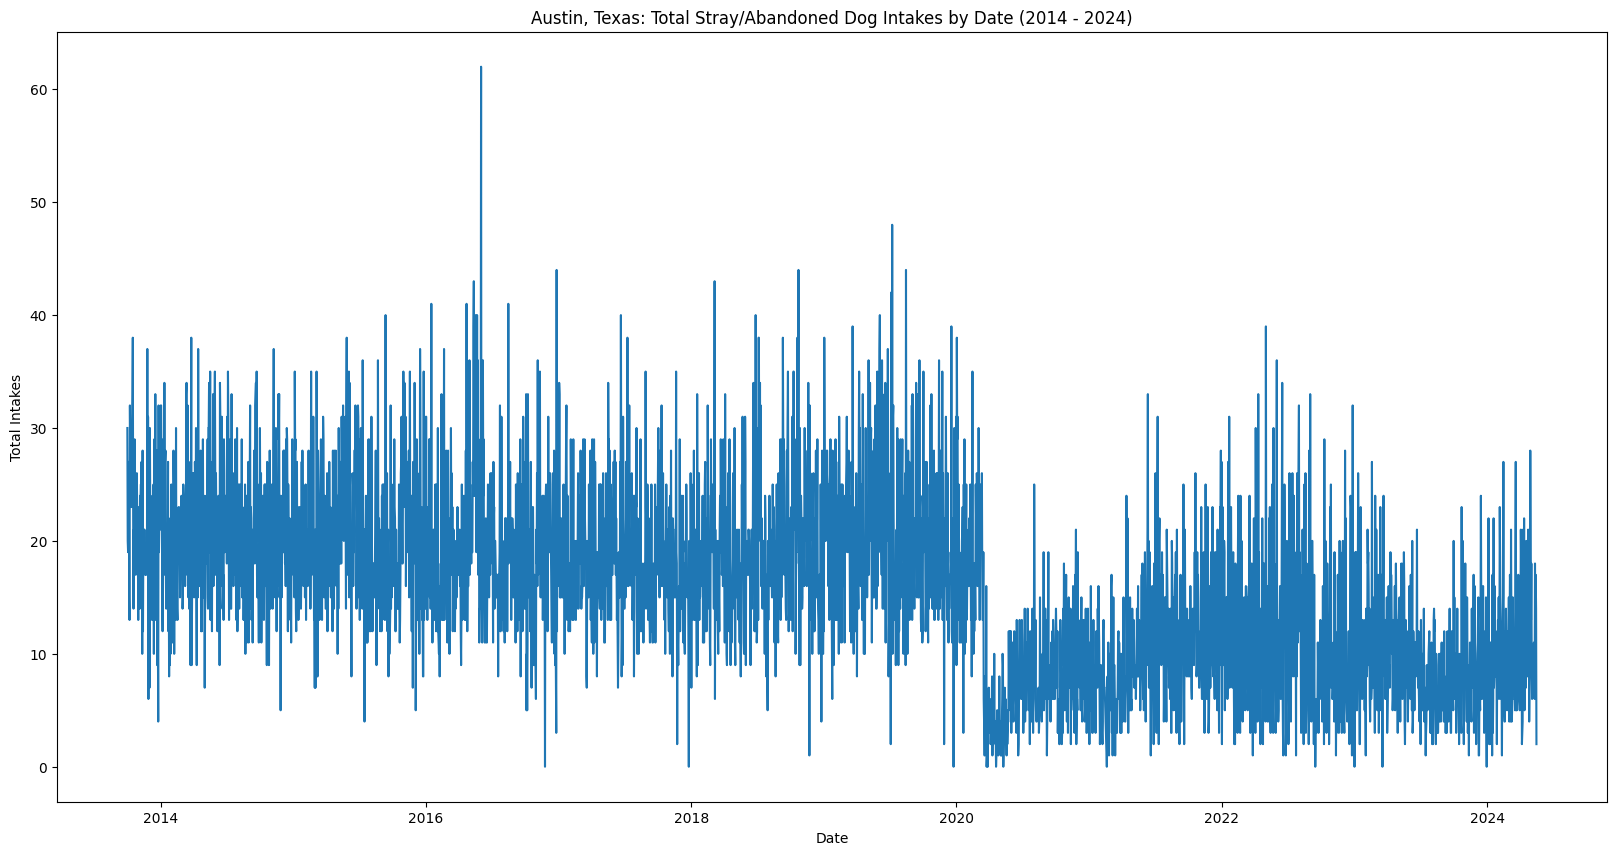

In [ ]:
#The plot for stray abandoned intakes
plt.figure(figsize=(20, 10))
plt.plot(TXStrayAbanbyDay['DateTime'], TXStrayAbanbyDay['Stray_Abandoned'])
plt.xlabel('Date')
plt.ylabel('Total Intakes')
plt.title('Austin, Texas: Total Stray/Abandoned Dog Intakes by Date (2014 - 2024)')

Text(0.5, 1.0, 'Austin, Texas: Total Euth Req Dog Intakes by Date (2014 - 2024)')

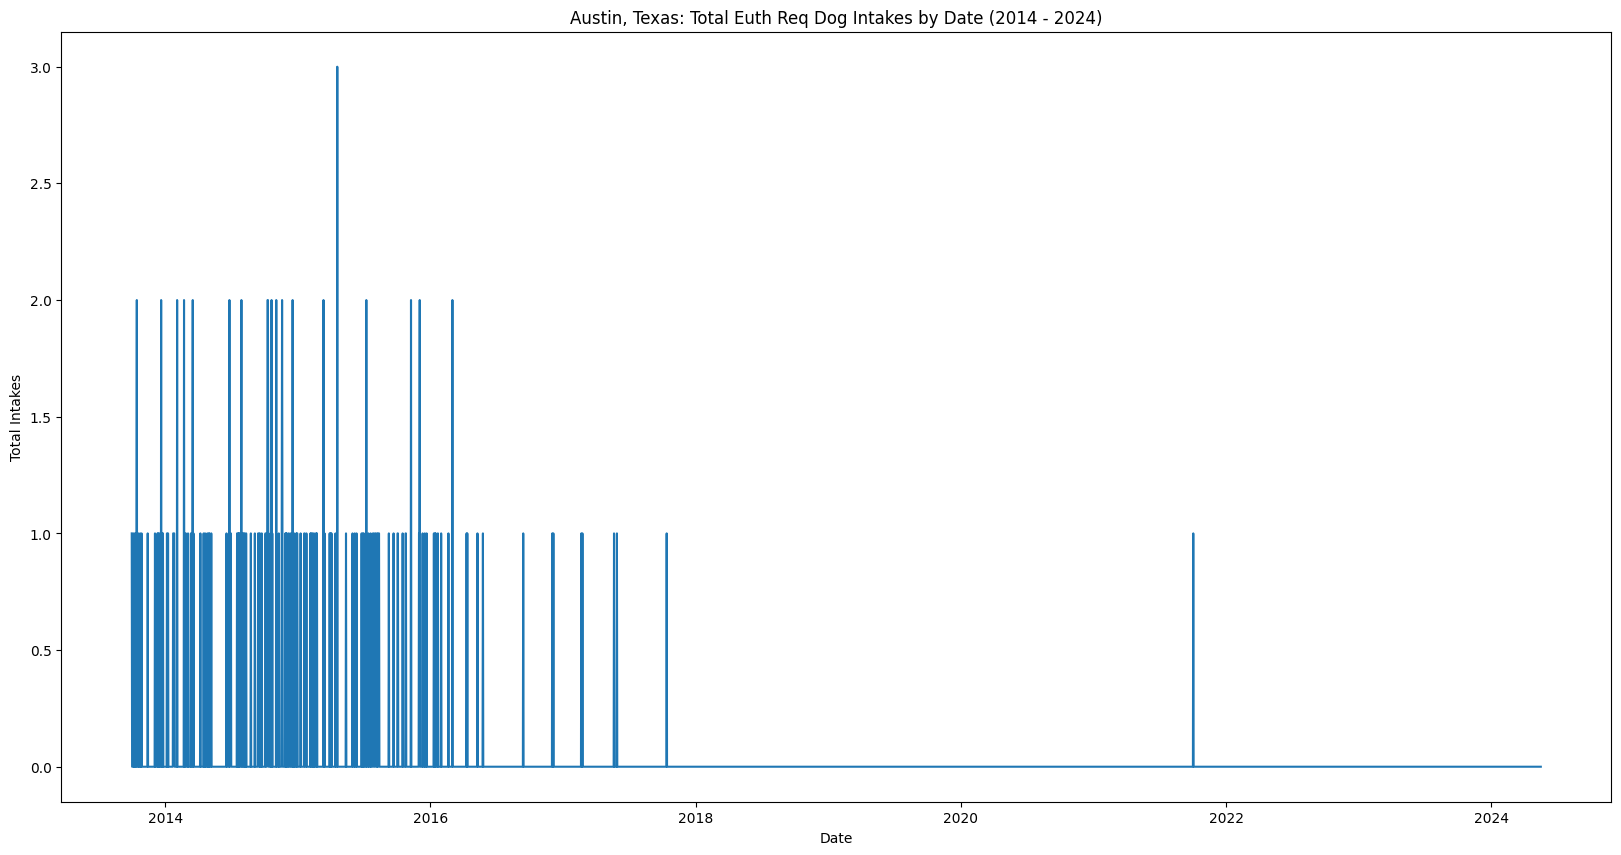

In [ ]:
##the plot by euthanasia req
plt.figure(figsize=(20, 10))
plt.plot(TXEuthRbyDay['DateTime'], TXEuthRbyDay['Euthanasia_Req'])
plt.xlabel('Date')
plt.ylabel('Total Intakes')
plt.title('Austin, Texas: Total Euth Req Dog Intakes by Date (2014 - 2024)')

Text(0.5, 1.0, 'Austin, Texas: Total Public Assists Dog Intakes by Date (2014 - 2024)')

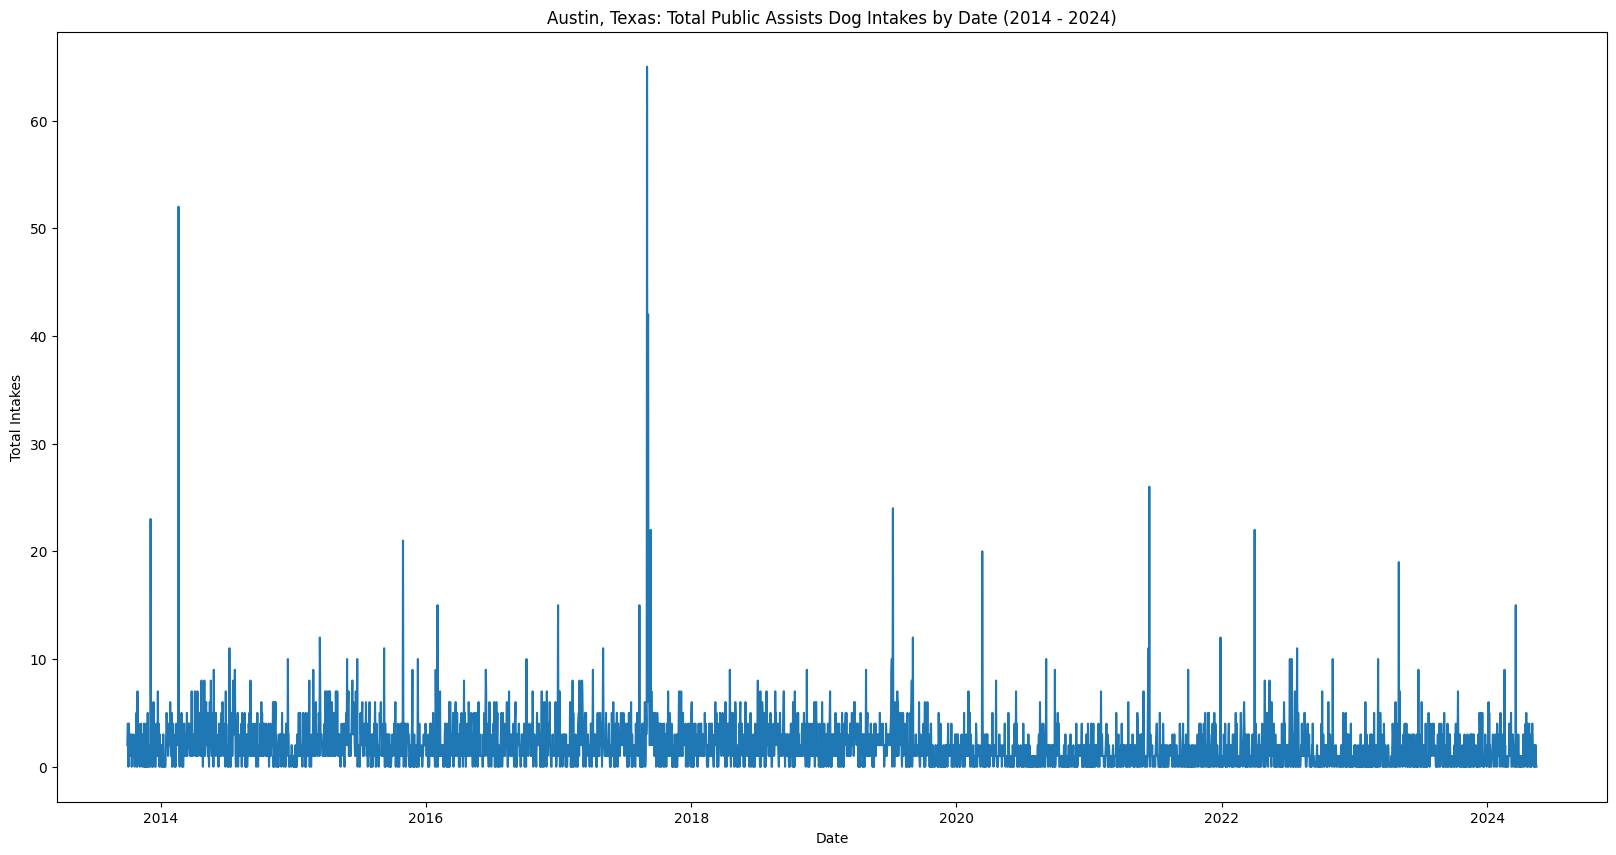

In [ ]:
##public assists by day
plt.figure(figsize=(20, 10))
plt.plot(TXPAbyDay['DateTime'], TXPAbyDay['Public_Assist'])
plt.xlabel('Date')
plt.ylabel('Total Intakes')
plt.title('Austin, Texas: Total Public Assists Dog Intakes by Date (2014 - 2024)')

Text(0.5, 1.0, 'Austin, Texas: Total Public Assists Dog Intakes by Date (2014 - 2024)')

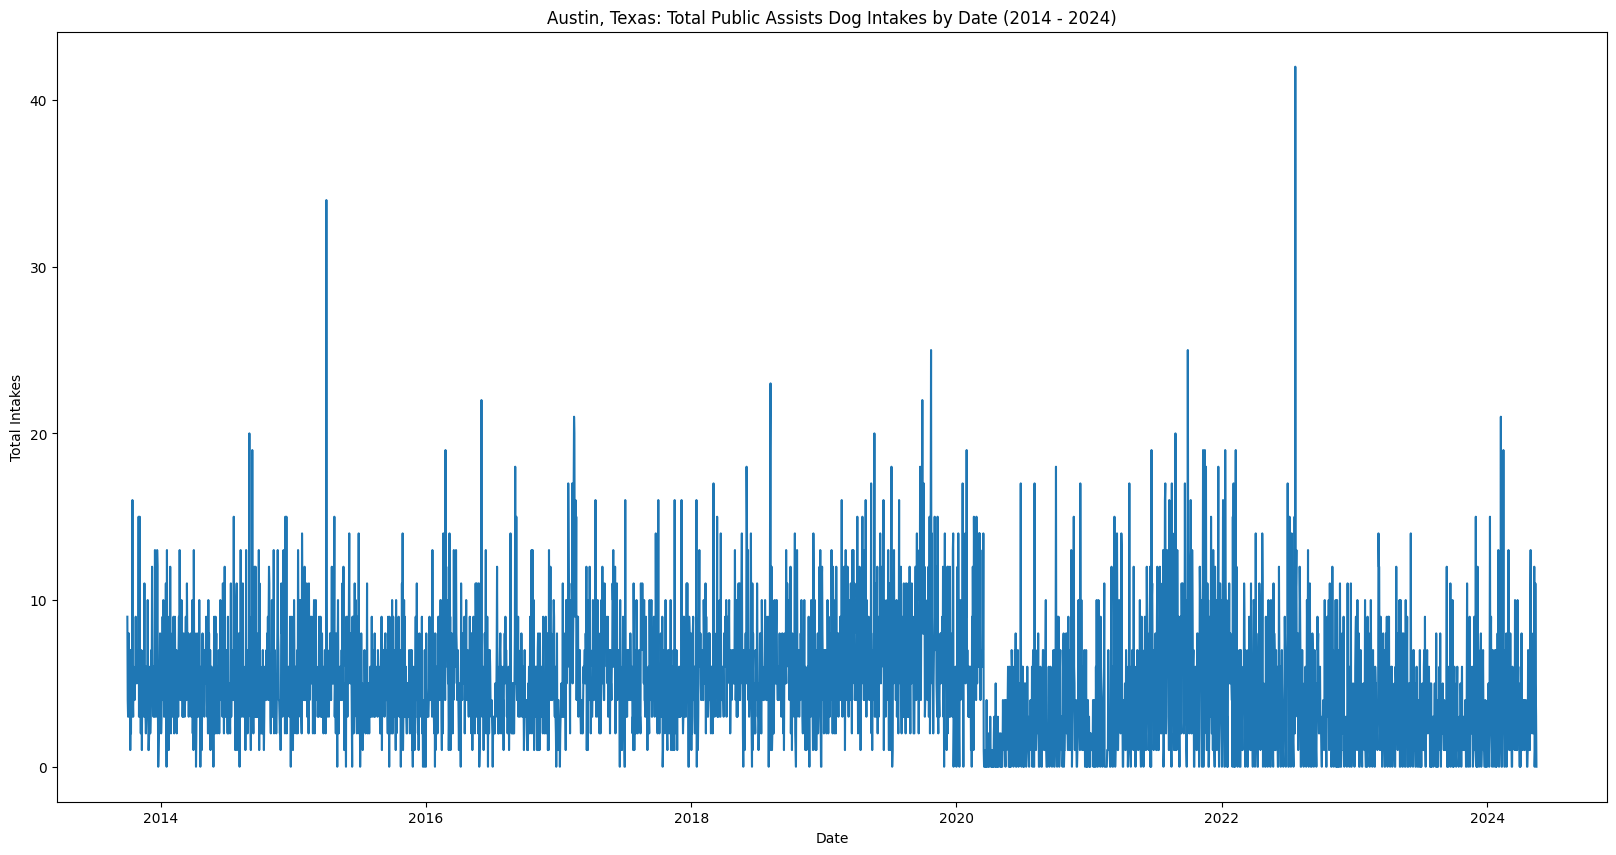

In [ ]:
##owner surrender by day
plt.figure(figsize=(20, 10))
plt.plot(TXSurrbyDay['DateTime'], TXSurrbyDay['Owner_Surrender'])
plt.xlabel('Date')
plt.ylabel('Total Intakes')
plt.title('Austin, Texas: Total Public Assists Dog Intakes by Date (2014 - 2024)')

In [ ]:
##Cleaning Out data
TXdogout = TXout[TXout["Animal Type"] == "Dog"]
print(TXdogout.head())


   Animal ID      Name            DateTime MonthYear Date of Birth  \
1    A776359     Gizmo 2018-07-18 16:02:00  Jul 2018    07/12/2017   
3    A720371     Moose 2016-02-13 17:59:00  Feb 2016    10/08/2015   
5    A659412  Princess 2020-10-05 14:37:00  Oct 2020    03/24/2013   
6    A814515   Quentin 2020-05-06 07:59:00  May 2020    03/01/2018   
10   A840370     Tulip 2021-08-19 19:36:00  Aug 2021    08/06/2019   

   Outcome Type Outcome Subtype Animal Type Sex upon Outcome Age upon Outcome  \
1      Adoption             NaN         Dog    Neutered Male           1 year   
3      Adoption             NaN         Dog    Neutered Male         4 months   
5      Adoption             NaN         Dog    Spayed Female          7 years   
6      Adoption          Foster         Dog    Neutered Male          2 years   
10     Adoption             NaN         Dog    Spayed Female          2 years   

                                   Breed        Color  
1                Chihuahua Shorthair

In [ ]:
##fixing datetime
TXdogout["DateTime"] = TXdogout["DateTime"].apply(remove_time_components)

/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_38752/2948738188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TXdogout["DateTime"] = TXdogout["DateTime"].apply(remove_time_components)


In [ ]:
##making blank outtake cols for for loop

TXdogout["Adopt"] = 0
TXdogout["RTO"] = 0
TXdogout["Euth"] = 0
TXdogout["Unintended"] = 0
TXdogout["Other"] = 0

/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_38752/2925476485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TXdogout["Adopt"] = 0
/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_38752/2925476485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TXdogout["RTO"] = 0
/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_38752/2925476485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [ ]:
print(TXdogout["Outcome Type"].value_counts())

for index, row in TXdogout.iterrows():
    ##if intake is stray or abanoned assign 1 to appropriate column
    if row['Outcome Type'] == "Return to Owner" or row['Outcome Type'] == "Rto-Adopt":
        TXdogout.at[index, 'RTO'] = 1
    ##same for surrender
    elif row['Outcome Type'] == "Adoption":
        TXdogout.at[index, 'Adopt'] = 1
    ##same for euthanasia
    elif row['Outcome Type'] == "Euthanasia":
        TXdogout.at[index, 'Euth'] = 1 
    ##Same for public assist and wildlife
    elif row['Outcome Type'] == "Transfer":
        TXdogout.at[index, 'Other'] = 1
    ##everything else is other - there is no other in the TX intake data
    else:
        TXdogout.at[index, 'Unintended'] = 1

Outcome Type
Adoption           44310
Return to Owner    22060
Transfer           19746
Euthanasia          2085
Rto-Adopt            909
Died                 370
Disposal              79
Missing               35
Stolen                 5
Name: count, dtype: int64


In [ ]:
#Checking if for loop works properly
print(TXdogout["RTO"].sum())
print(TXdogout["Adopt"].sum())
print(TXdogout["Euth"].sum())
print(TXdogout["Unintended"].sum())
print(TXdogout["Other"].sum())

22969
44310
2085
509
19746


In [ ]:
#selecting only columns we need (start here for stage 2)
print(TXdogout.head())
keepercols2 = ['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Outcome Type', 'Adopt', 'RTO', 'Euth', 'Unintended', 'Other']
TXdogoutclean = TXdogout[keepercols2]


   Animal ID      Name   DateTime MonthYear Date of Birth Outcome Type  \
1    A776359     Gizmo 2018-07-18  Jul 2018    07/12/2017     Adoption   
3    A720371     Moose 2016-02-13  Feb 2016    10/08/2015     Adoption   
5    A659412  Princess 2020-10-05  Oct 2020    03/24/2013     Adoption   
6    A814515   Quentin 2020-05-06  May 2020    03/01/2018     Adoption   
10   A840370     Tulip 2021-08-19  Aug 2021    08/06/2019     Adoption   

   Outcome Subtype Animal Type Sex upon Outcome Age upon Outcome  \
1              NaN         Dog    Neutered Male           1 year   
3              NaN         Dog    Neutered Male         4 months   
5              NaN         Dog    Spayed Female          7 years   
6           Foster         Dog    Neutered Male          2 years   
10             NaN         Dog    Spayed Female          2 years   

                                   Breed        Color  Adopt  RTO  Euth  \
1                Chihuahua Shorthair Mix  White/Brown      1    0     0

In [ ]:
##making total outcomes column
TXdogoutclean['TotalOutcomes'] = TXdogoutclean['RTO'] + TXdogoutclean['Adopt'] + TXdogoutclean['Euth'] + TXdogoutclean['Other'] + TXdogoutclean['Unintended']

/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_38752/1271496129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TXdogoutclean['TotalOutcomes'] = TXdogoutclean['RTO'] + TXdogoutclean['Adopt'] + TXdogoutclean['Euth'] + TXdogoutclean['Other'] + TXdogoutclean['Unintended']


In [ ]:
##Creating outtake plots data

TXAdoptbyDay = TXdogoutclean.groupby('DateTime')['Adopt'].sum().reset_index()
TXEuthbyDay = TXdogoutclean.groupby('DateTime')['Euth'].sum().reset_index()
TXRTObyDay = TXdogoutclean.groupby('DateTime')['RTO'].sum().reset_index()
TXUnintbyDay = TXdogoutclean.groupby('DateTime')['Unintended'].sum().reset_index()
TXOtherOutbyDay = TXdogoutclean.groupby('DateTime')['Other'].sum().reset_index()
TXTotalOutbyDay = TXdogoutclean.groupby('DateTime')['TotalOutcomes'].sum().reset_index()

Text(0.5, 1.0, 'Austin, Texas: Total Dog Outtakes by Date (2014 - 2024)')

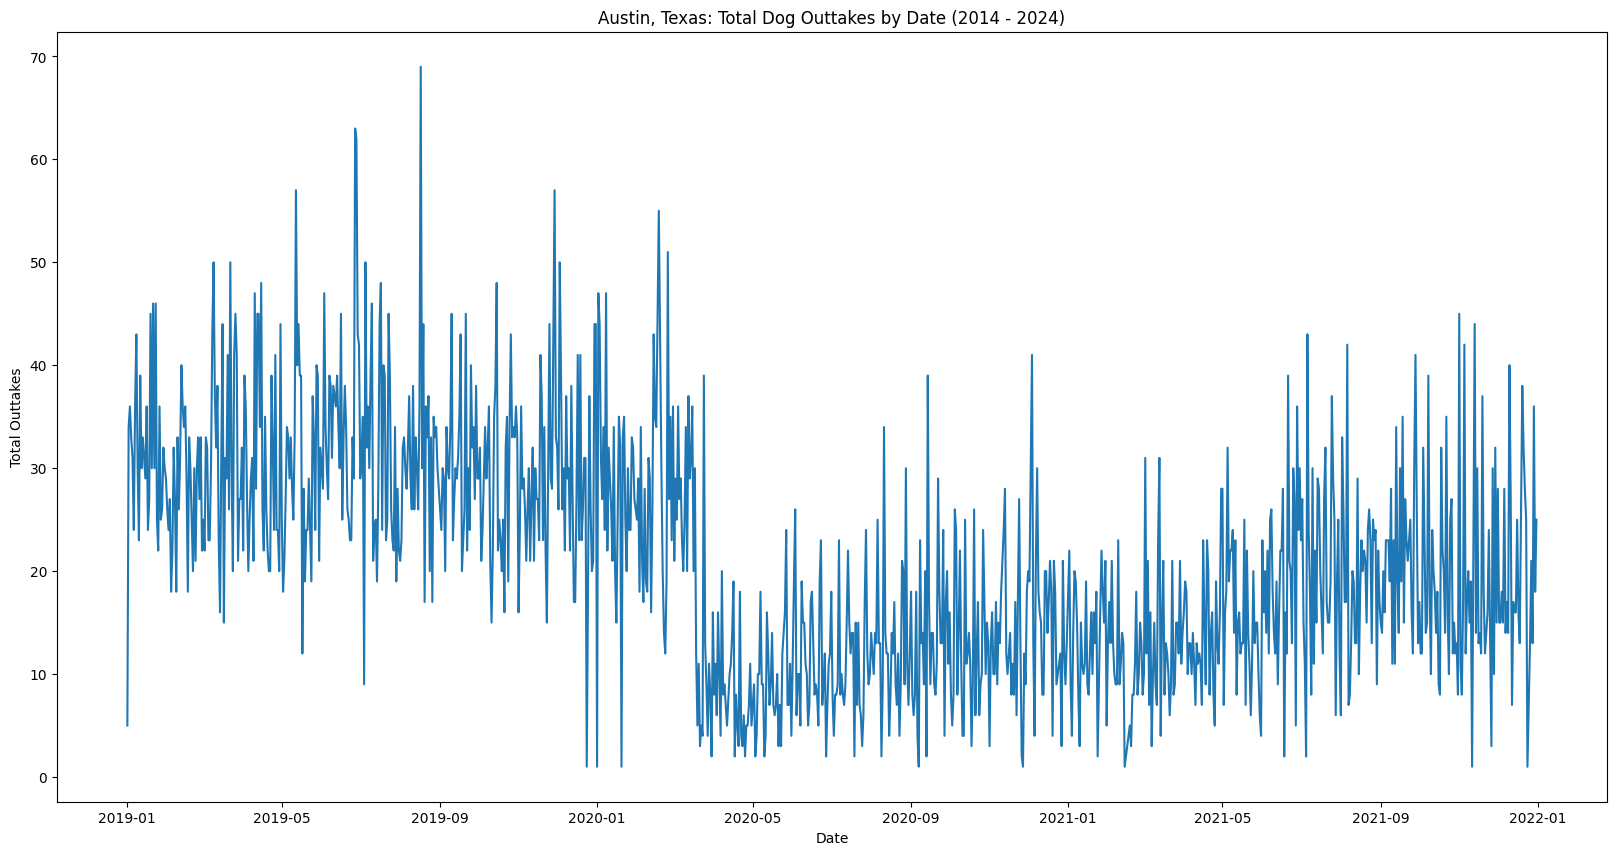

In [ ]:
##Making plots
##IF YOU WANT TO SLICE YEARS HERES HOW
start_year = 2019
end_year = 2021
TXTotalOutbyDay = TXTotalOutbyDay[(TXTotalOutbyDay['DateTime'].dt.year >= start_year) & (TXTotalOutbyDay['DateTime'].dt.year <= end_year)]

plt.figure(figsize=(20, 10))
plt.plot(TXTotalOutbyDay['DateTime'], TXTotalOutbyDay['TotalOutcomes'])
plt.xlabel('Date')
plt.ylabel('Total Outtakes')
plt.title('Austin, Texas: Total Dog Outtakes by Date (2014 - 2024)')

Text(0.5, 1.0, 'Austin, Texas: Total Dog Euth by Date (2014 - 2024)')

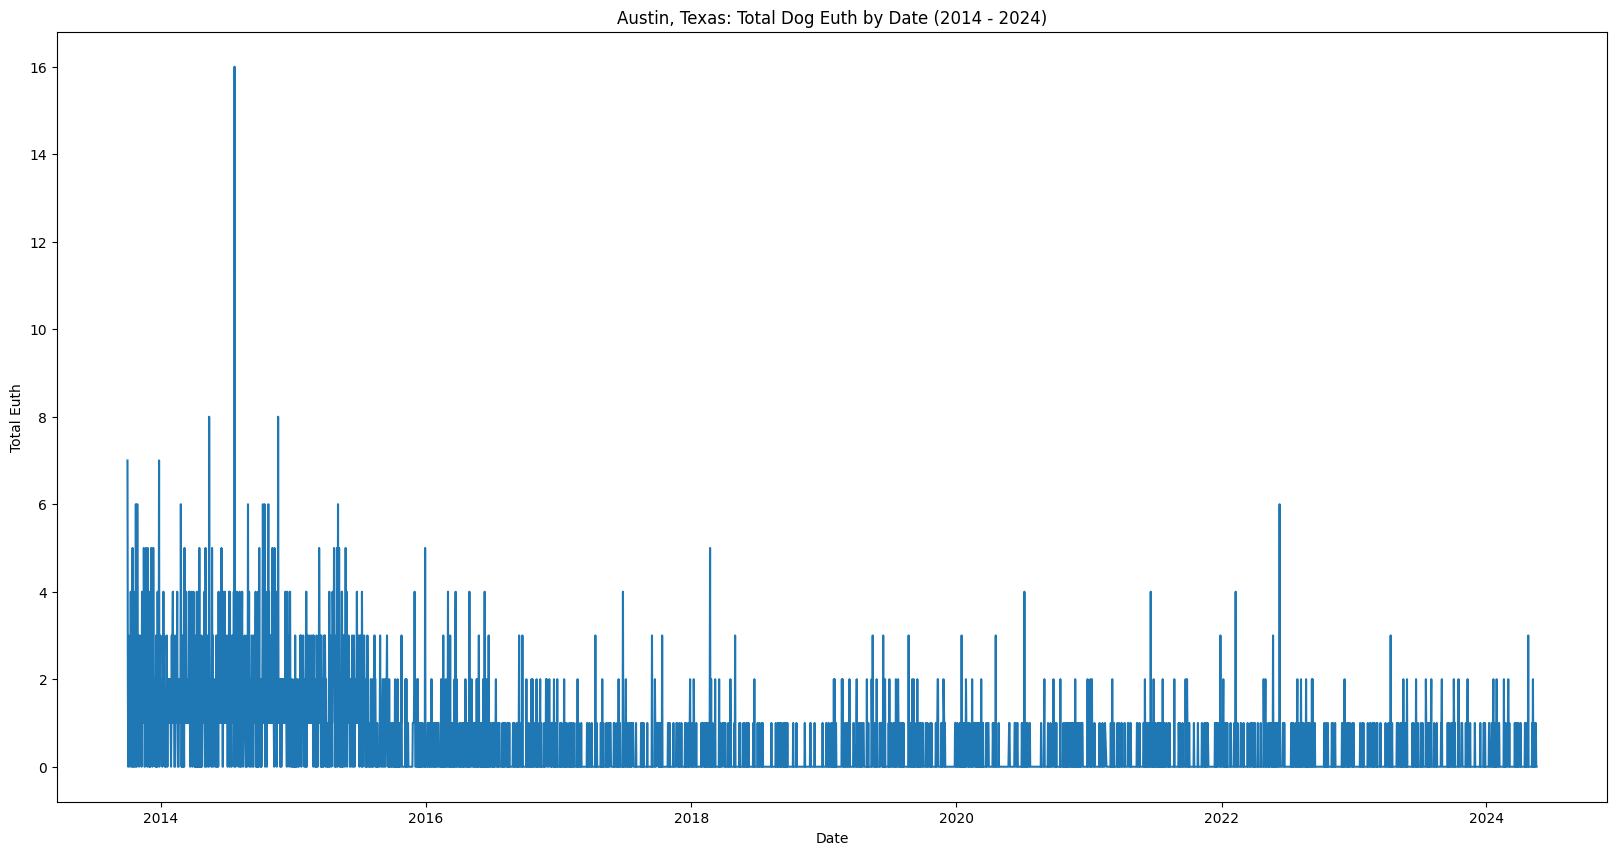

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(TXEuthbyDay['DateTime'], TXEuthbyDay['Euth'])
plt.xlabel('Date')
plt.ylabel('Total Euth')
plt.title('Austin, Texas: Total Dog Euth by Date (2014 - 2024)')

Text(0.5, 1.0, 'Austin, Texas: Total Unintended Outcomes by Date (2014 - 2024)')

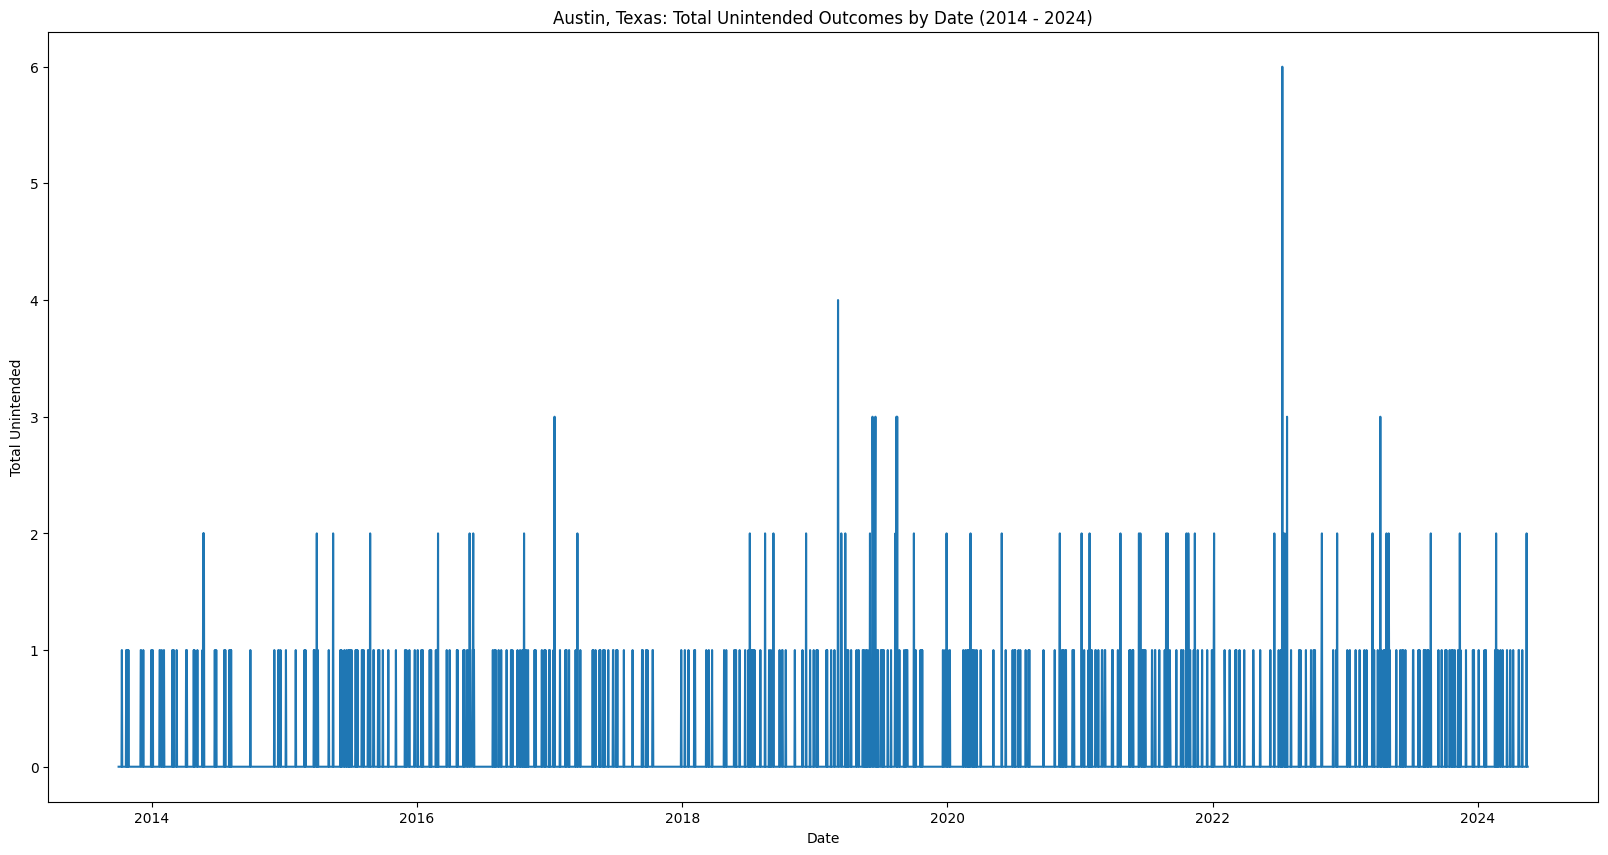

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(TXUnintbyDay['DateTime'], TXUnintbyDay['Unintended'])
plt.xlabel('Date')
plt.ylabel('Total Unintended')
plt.title('Austin, Texas: Total Unintended Outcomes by Date (2014 - 2024)')

Text(0.5, 1.0, 'Austin, Texas: Total Adoptions by Date (2014 - 2024)')

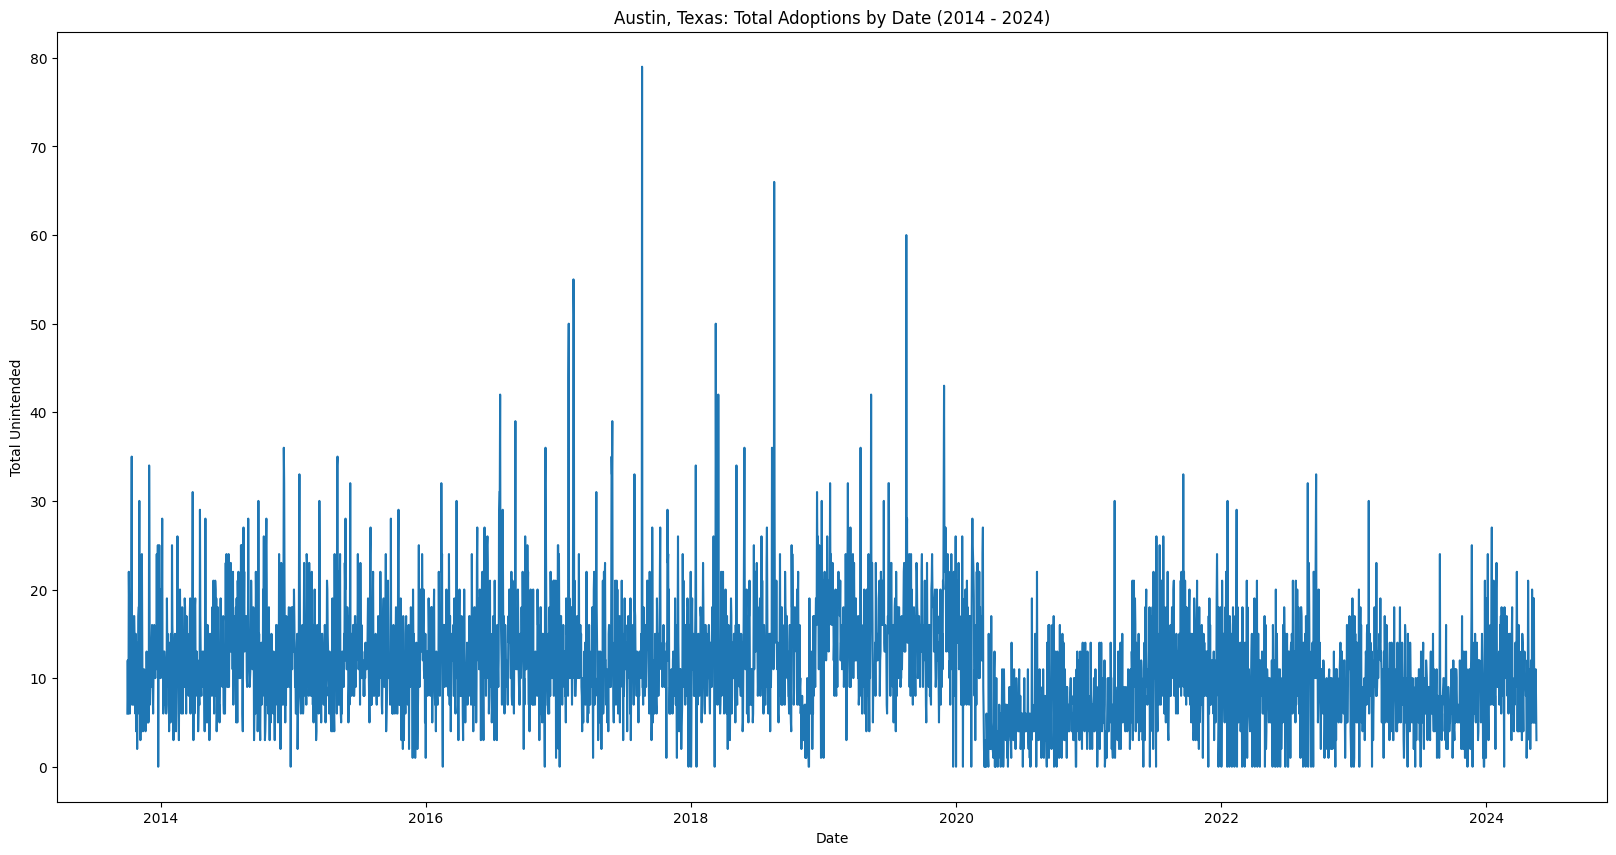

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(TXAdoptbyDay['DateTime'], TXAdoptbyDay['Adopt'])
plt.xlabel('Date')
plt.ylabel('Total Unintended')
plt.title('Austin, Texas: Total Adoptions by Date (2014 - 2024)')